In [1]:
# Hierarchical clustering algorithm


# importing the module
import pandas as pd
from IPython.display import Image


# importing the dataset
dataset = pd.read_csv('eruption_dataset.csv')
# dataset 
dataset.head()

,number,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [2]:
# find how many records and columns (should be (200,5)
dataset.shape

(272, 3)

In [3]:
# give information such as column names, data type, and size
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     272 non-null    int64  
 1   eruptions  272 non-null    float64
 2   waiting    272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [4]:
# describe the dataset: give an idea what the data is saying about frequency, etc.

dataset.describe()

,number,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,136.500000,3.487783,70.897059
std,78.663842,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,68.750000,2.162750,58.000000
50%,136.500000,4.000000,76.000000
75%,204.250000,4.454250,82.000000
max,272.000000,5.100000,96.000000


In [5]:
# we take only 2 featurs to classify customers (Income and Spending score)
# on column


# give all rows, start with column 3 to the rest of columns

X = dataset.iloc[:,1:] 
X.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

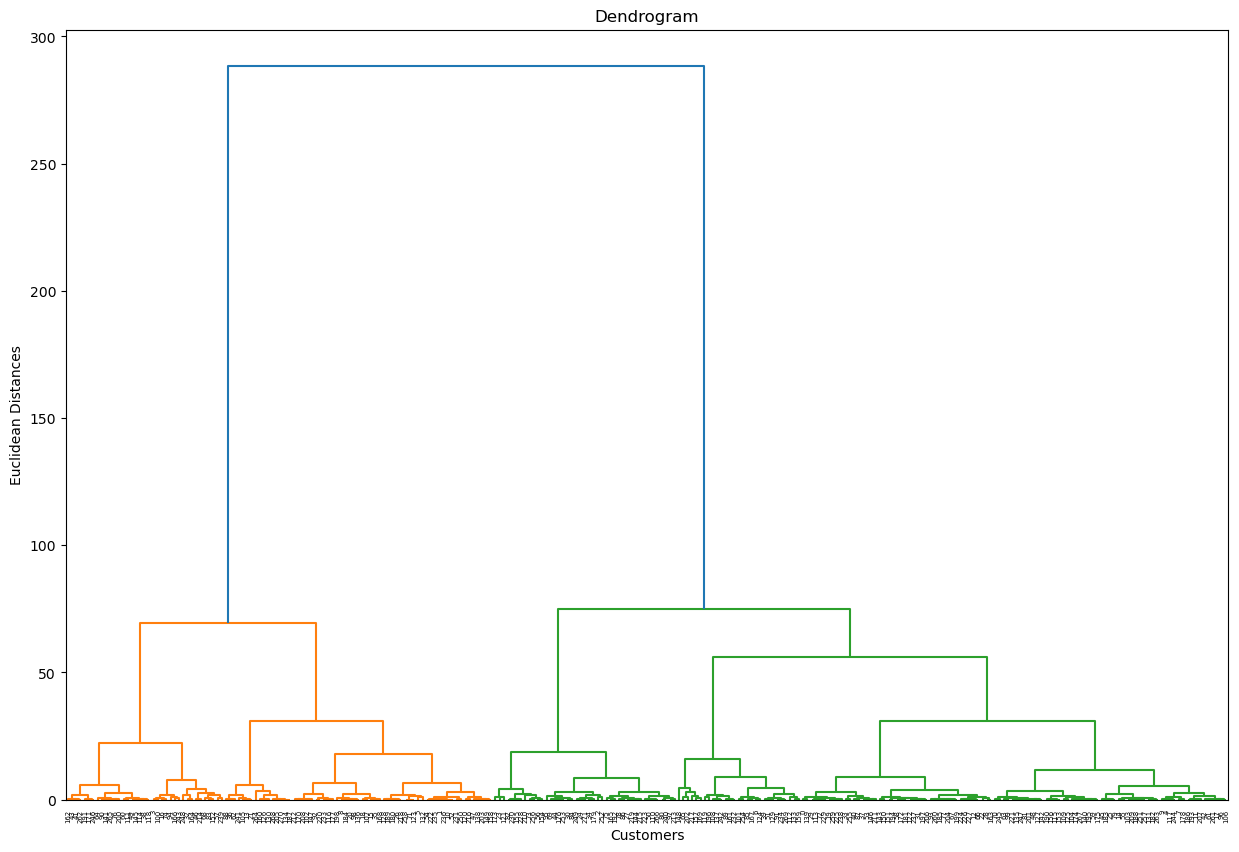

In [7]:
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

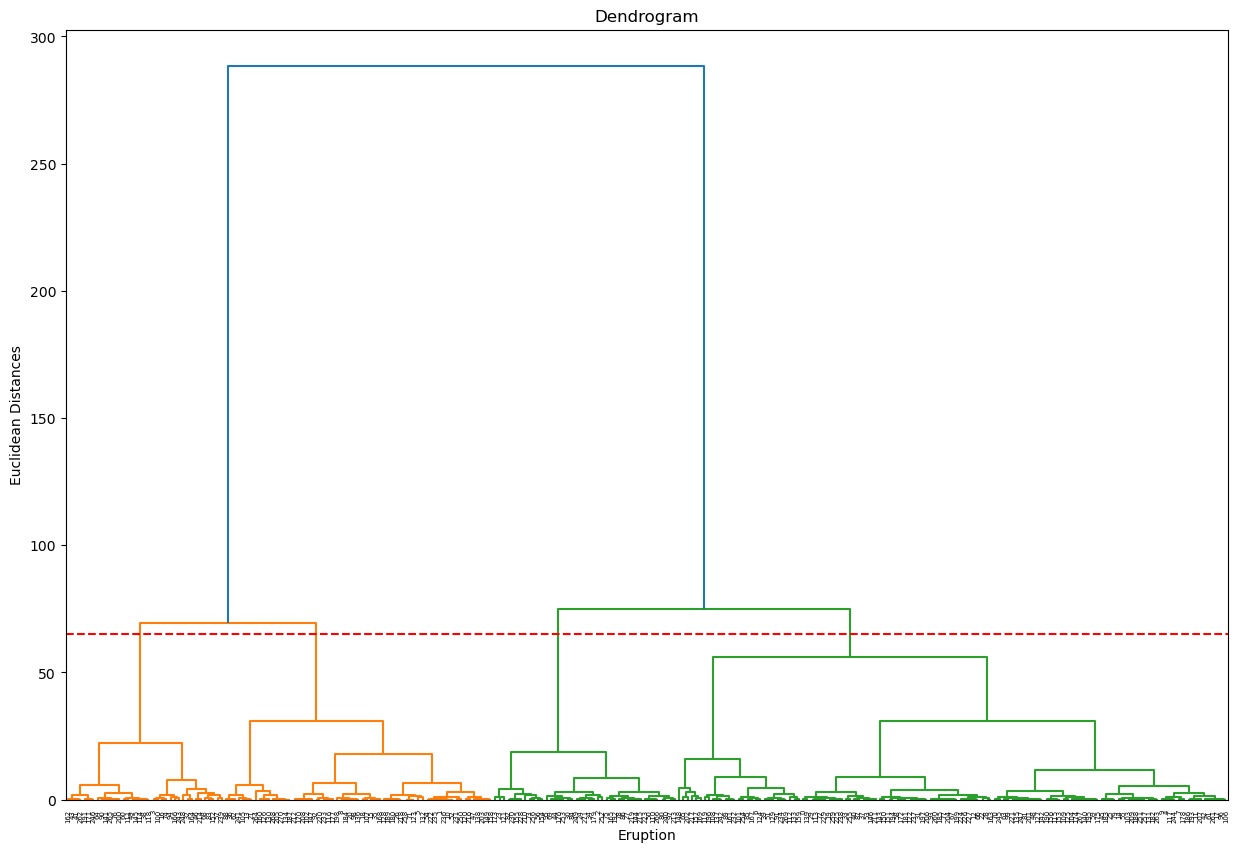

In [14]:
# the horizontal threshold is 65

# the threshold will give how many clusters you will have by couting the vertical line
# here we have 2 clusters.

dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Eruption')
plt.ylabel('Euclidean Distances')
plt.axhline(65, c='r', linestyle='--')
plt.show()



In [13]:
# Agglomerative hierarchical Cluster
# starting with single clusters and group them into one final cluster

from sklearn.cluster import AgglomerativeClustering

# number of cluster is given
hc_Agg = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

# hc_Agg.fit_predict return the aggregate
y_hc = hc_Agg.fit_predict(X)


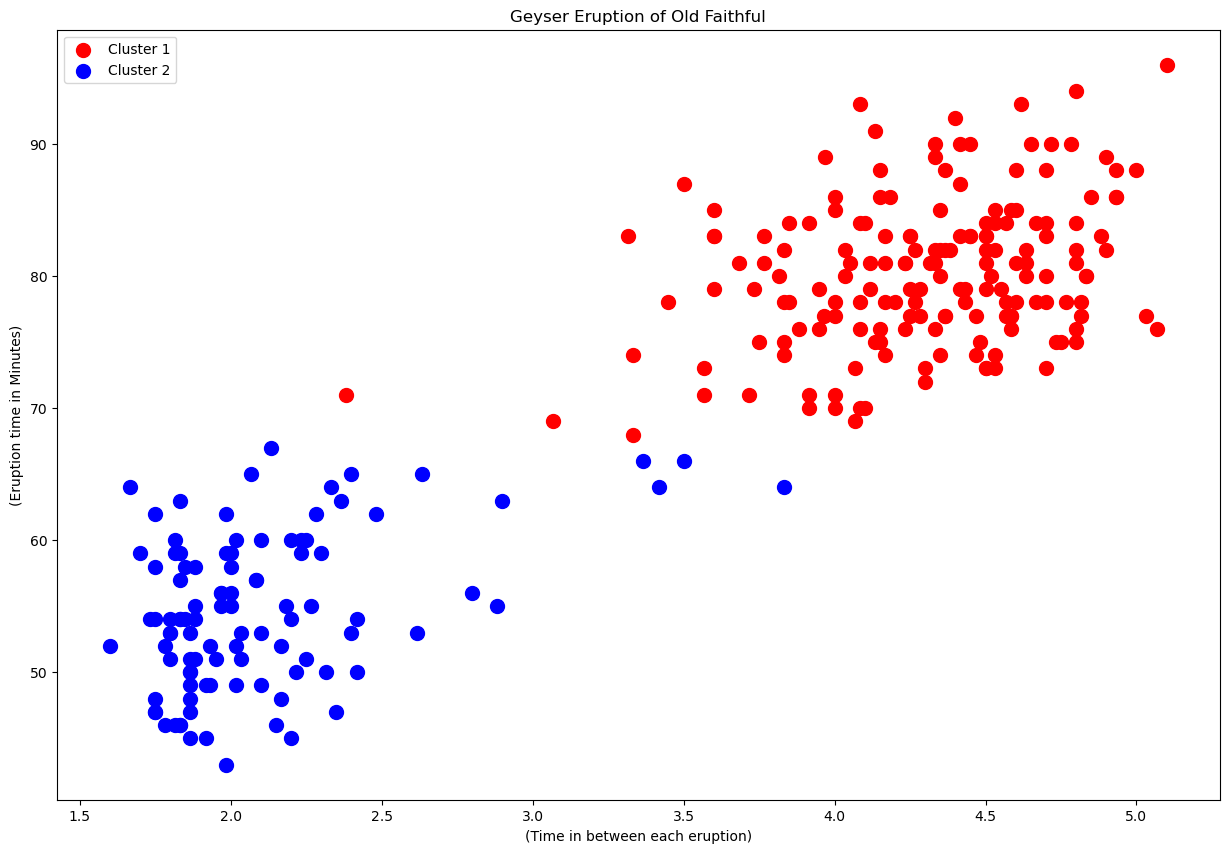

In [19]:
# Visualizing the clusters

# The original graph plot 5 cluster. You have to know how to plot clusters for dataset of different size.
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
#plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
#plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Geyser Eruption of Old Faithful')
plt.xlabel('(Time in between each eruption)')
plt.ylabel('(Eruption time in Minutes)')
plt.legend()
plt.show()